In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
import struct, os
import time
import xarray as xr
import pandas as pd
import scipy as scp

import obspy
from obspy import read_inventory, read, signal, UTCDateTime, Stream, Trace


In [4]:
from src.pyoad.pyoad import read_data_24bit, save2mseed
file_name = '/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/05140537.D21'
records_range = np.arange(10,13,1)
header_df, waveforms = read_data_24bit(file_name, records_range)

# save2mseed(waveforms)

125830064 138412968
138412968 150995872
150995872 163578776


In [5]:
save2mseed(waveforms)

creating station directory
creating station directory
creating station directory
creating station directory


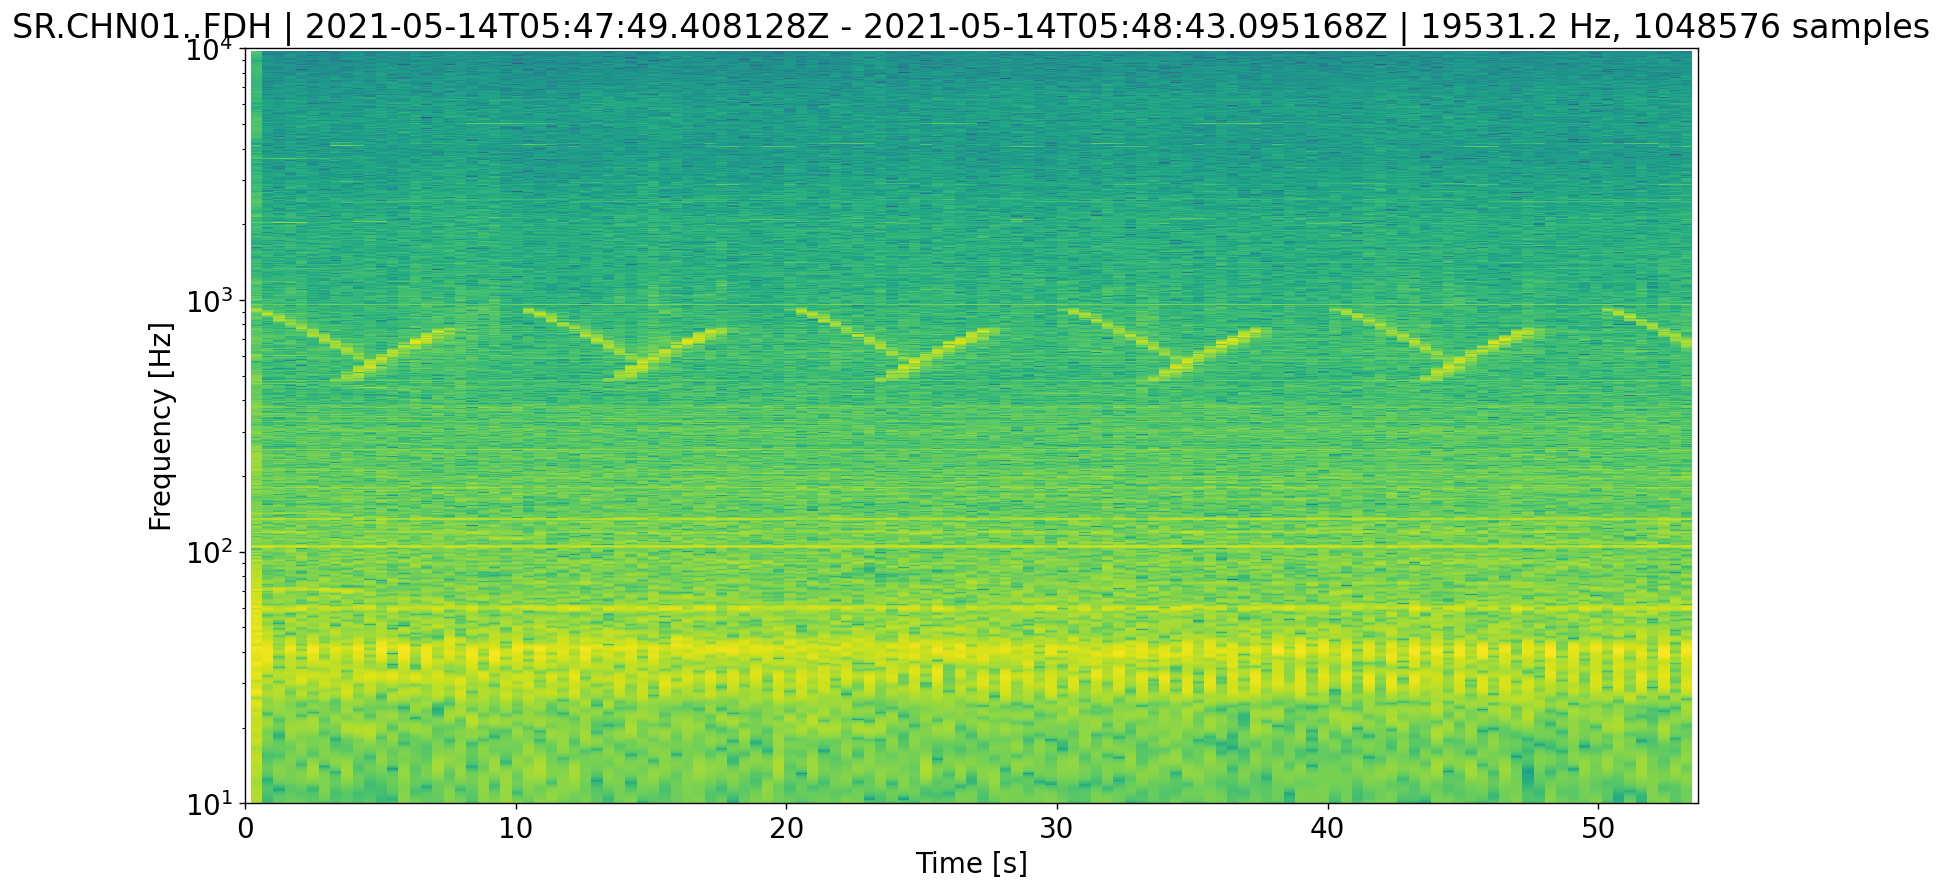

In [10]:
test = read('Results/2021/SR905/CHN01/SR905.CHN01..FDH.2021.134.5.47.49')
fig = test[0].spectrogram(wlen=1, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
# plt.xlim(20,30)
plt.show()

/Users/gilaverbuch/opt/miniconda3/envs/pyoad/lib/python3.10/site-packages/obspy/imaging/util.py:266: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/Users/gilaverbuch/opt/miniconda3/envs/pyoad/lib/python3.10/site-packages/obspy/imaging/waveform.py:805: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


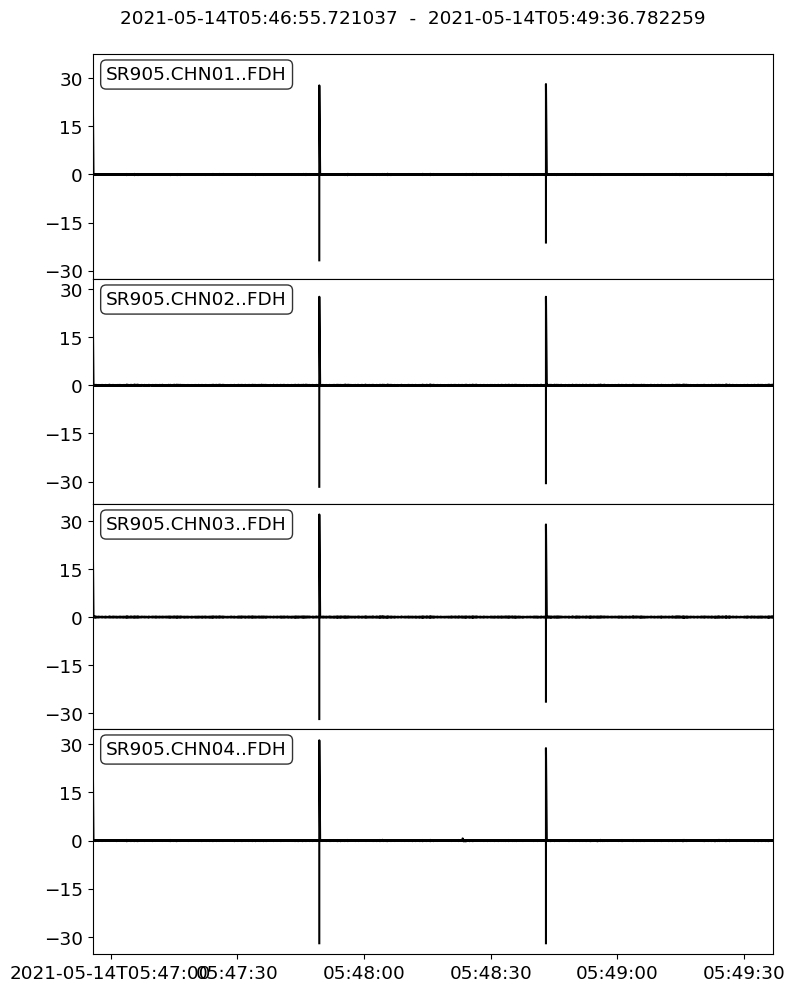

In [8]:
waveforms.plot();

In [3]:
waveforms.merge()

4 Trace(s) in Stream:
SR905.CHN01..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911347Z | 19531.2 Hz, 3145728 samples
SR905.CHN02..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911347Z | 19531.2 Hz, 3145728 samples
SR905.CHN03..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911347Z | 19531.2 Hz, 3145728 samples
SR905.CHN04..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911347Z | 19531.2 Hz, 3145728 samples

In [27]:
waveforms2 = waveforms.copy()
waveforms2.merge(method=1, interpolation_samples=0)

4 Trace(s) in Stream:
SR905.CHN01..FDH | 2021-05-14T05:46:55.721037Z - 2021-05-14T05:48:43.095168Z | 19531.2 Hz, 2097152 samples
SR905.CHN02..FDH | 2021-05-14T05:46:55.721037Z - 2021-05-14T05:48:43.095168Z | 19531.2 Hz, 2097152 samples
SR905.CHN03..FDH | 2021-05-14T05:46:55.721037Z - 2021-05-14T05:48:43.095168Z | 19531.2 Hz, 2097152 samples
SR905.CHN04..FDH | 2021-05-14T05:46:55.721037Z - 2021-05-14T05:48:43.095168Z | 19531.2 Hz, 2097152 samples

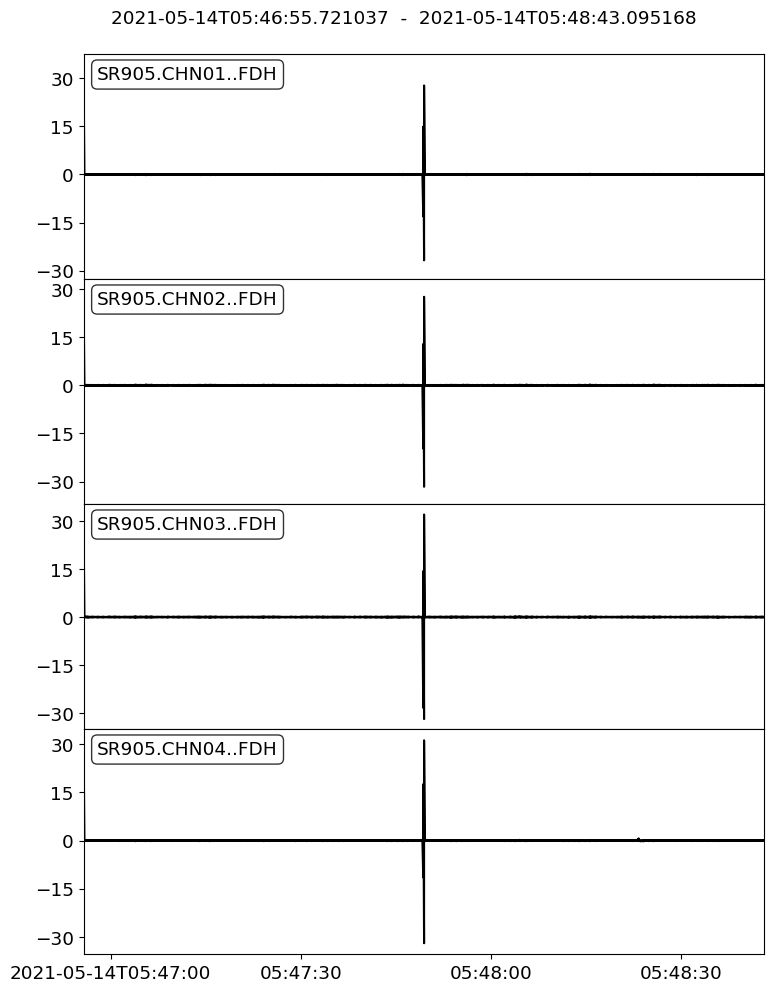

In [28]:
waveforms2.plot();

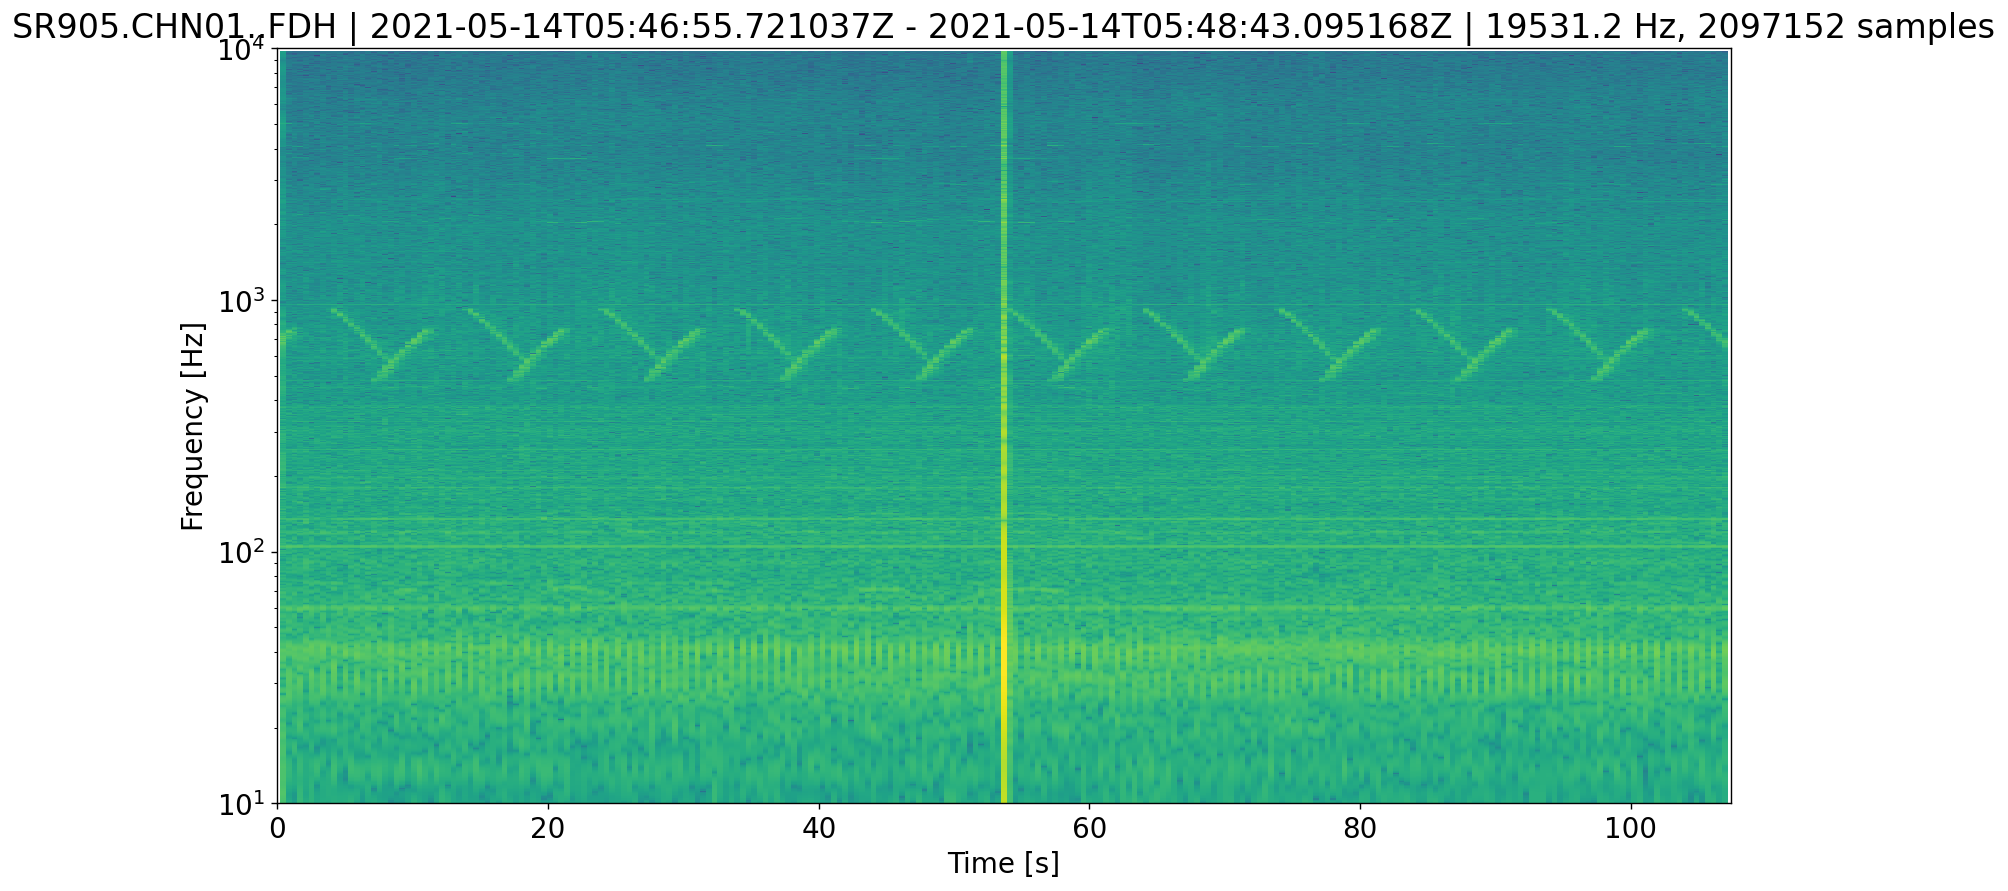

In [29]:
fig = waveforms2[0].spectrogram(wlen=1, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
# plt.xlim(20,30)
plt.show()

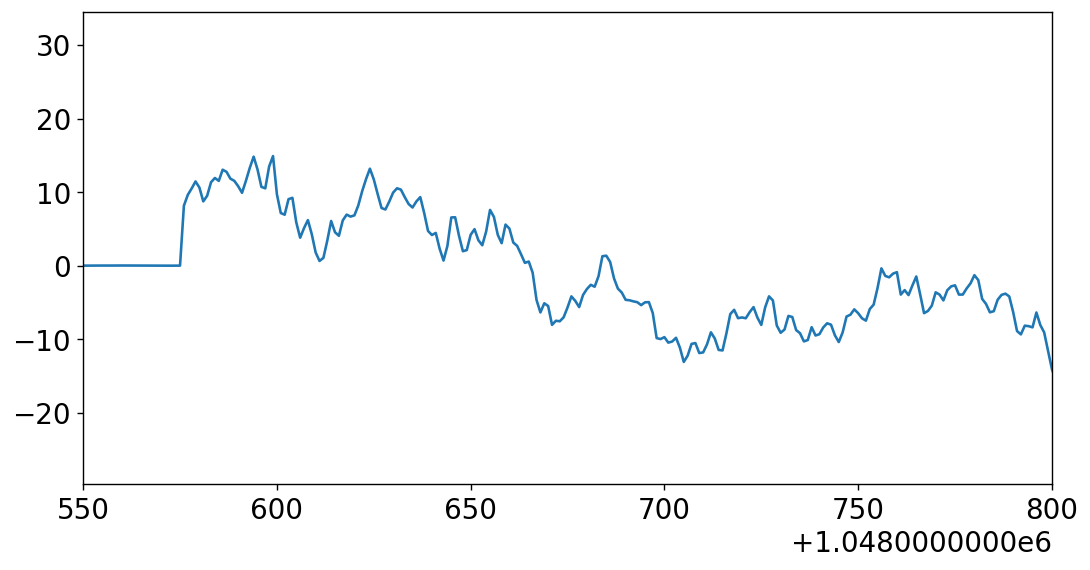

In [26]:
plt.figure(figsize=(10,5))
plt.plot(waveforms2[0])
plt.xlim(1.04855*1e6, 1.0488*1e6)
plt.show()

In [9]:
tr = waveforms[0].copy()
tr.filter('bandpass', freqmin=1e1,freqmax=8e2,  corners=4, zerophase=True)

data_envelope = obspy.signal.filter.envelope(tr.data)

In [ ]:
data = waveforms[0].data
npts = waveforms[0].stats.npts
samprate = waveforms[0].stats.sampling_rate
t = np.arange(0, npts / samprate, 1 / samprate)

plt.figure()
plt.plot(t, waveforms[0].data, 'k')
plt.plot(t, data_envelope.data, 'r')
plt.title(waveforms[0].stats.starttime)
plt.ylabel('Filtered Data w/ Envelope')
plt.xlabel('Time [s]')
plt.xlim(11, 11.2)
plt.show()

In [18]:
tr_rec1 = waveforms[0].copy() 
tr_rec2 = waveforms[1].copy()
tr_rec3 = waveforms[2].copy()

# tr_ch1_rec2 = waveforms[4].copy()

In [6]:
samp_freq = 19531.25
dt = 1/samp_freq
time_p = np.arange(0, tr_rec1.stats.npts*dt, dt)

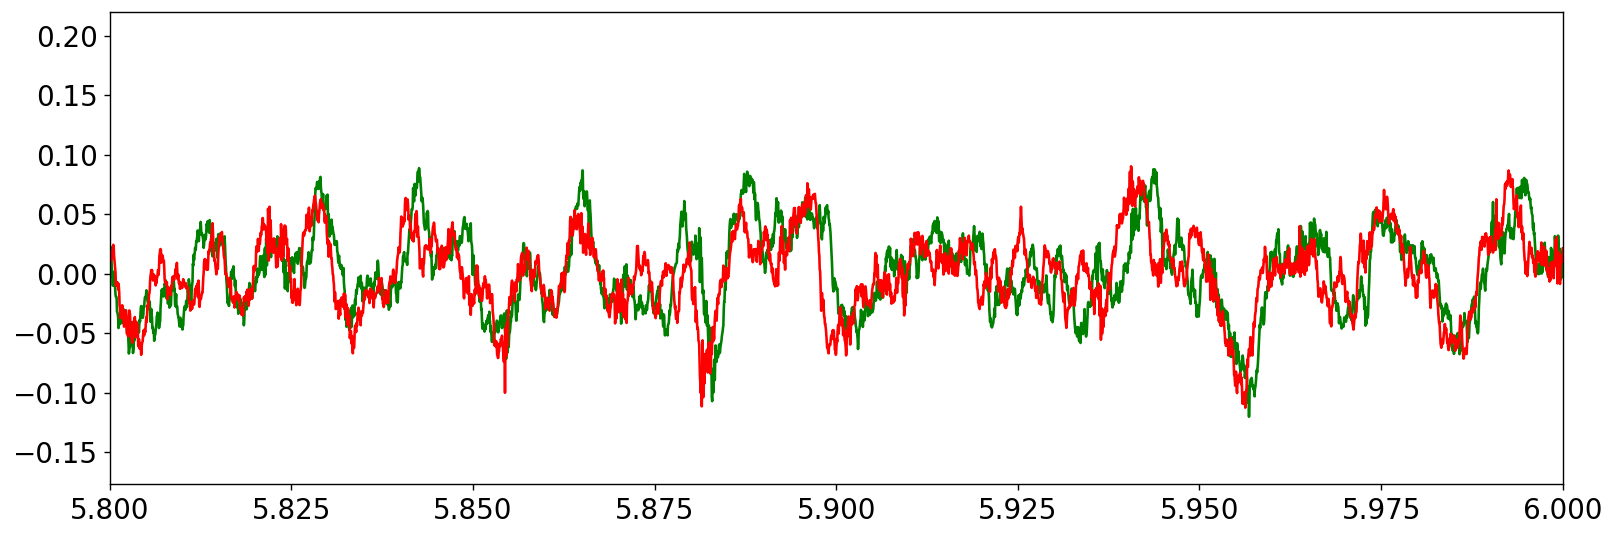

In [7]:

plt.figure(figsize = (15,5))
plt.plot(time_p, tr_rec2.data, 'g')
plt.plot(time_p, tr_rec1.data, 'r')
# plt.plot(time_p, channel2*2.5e2, 'r')
plt.xlim(5.8,6)
plt.show()

# Data from YT's matlab code

In [8]:
matlab_channel1_rec1 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel1_rec1.scv')
matlab_channel2_rec1 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel2_rec1.scv')
matlab_channel3_rec1 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel3_rec1.scv')

matlab_channel1_rec2 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel1_rec2.scv')

# Header = read_header()

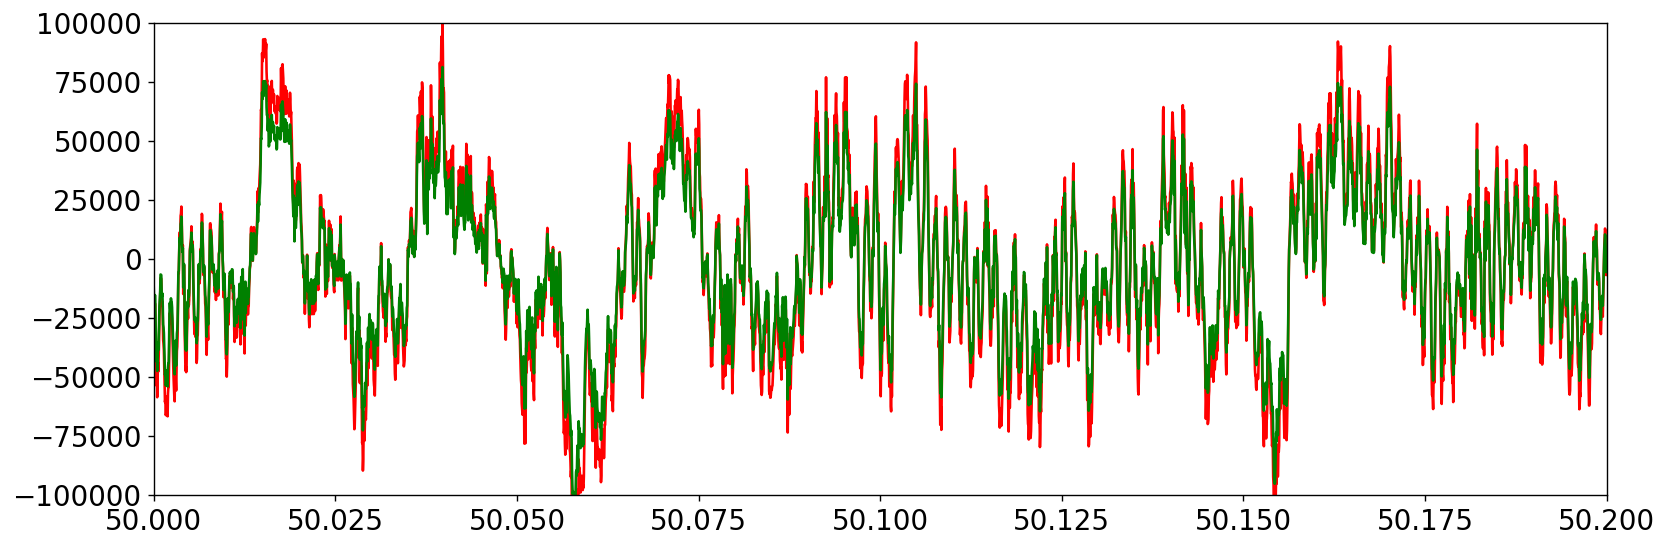

In [12]:
samp_freq = 19531.25
dt = 1/samp_freq
time_m = np.arange(0, len(matlab_channel1_rec1)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_m, matlab_channel3_rec1, 'r')
plt.plot(time_p, tr_rec3.data*1e6, 'g')

# plt.plot(time_m, matlab_channel1_rec2, 'r')
# plt.plot(time_p, tr_ch1_rec2.data*1e6, 'g')
plt.xlim(50,50.2)
plt.ylim(-1e5, 1e5)
plt.show()

In [10]:

f, t, Sxx = signal.spectrogram(matlab_channel, samp_freq, nperseg=int(samp_freq), noverlap=int(samp_freq//2))
plt.figure(figsize=(10,5))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(10,20)
plt.ylim(0,200)
plt.clim(0,1e-9)
plt.colorbar()
plt.title('from matlab')
plt.show()

AttributeError: module 'obspy.signal' has no attribute 'spectrogram'

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_m = np.arange(0, len(matlab_channel)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_m, matlab_channel*1e-4, 'r')

plt.show()

# My python code

In [ ]:
f_data = open(file_name, "rb")  # reopen the file
x = f_data.read()

In [ ]:
xs = bytearray(b'\x00\x1b\xcf')
xs.append(0)
print(xs)
struct.unpack('>i', b'\x00\x1b\xcf\x00')[0], int.from_bytes(xs, byteorder='big', signed=True)

In [ ]:
pos = 1024
l = (len(x[1024:])//128)
npts = 1048576

l1 = l*0
l2 = l1+l
def get_data(x, pos, l):
    
    data=[]
    for loc in range(l1+pos,l2, 12):
    
        d = bytearray(x[loc:loc+3])
        d.append(0)
        dpoint = int.from_bytes(d, byteorder='big', signed=True) * (2.5/(2**23)/20)
        data.append(dpoint)
    
    return data
    
    

In [ ]:
start = time.time()

channel1 = get_data(x, pos, l)

end  = time.time()
print ("Time elapsed:", end - start)

In [ ]:
len(matlab_channel) / len(channel1)

In [ ]:
channel1 = np.asarray(channel1, dtype=np.float32)

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_p = np.arange(0, len(channel1)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_p, channel1, 'g')
# plt.plot(time_p, channel2*2.5e2, 'r')
# plt.xlim(5.8,6)
plt.show()

In [ ]:
f, t, Sxx = signal.spectrogram(channel1, samp_freq, nperseg=int(samp_freq), noverlap=int(samp_freq//2))
plt.figure(figsize=(10,5))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(10,20)
plt.ylim(0,200)
# plt.clim(-10, -5)
plt.colorbar()
plt.title('from python')
plt.show()